# The Best Neighborhood in Pittsburgh

CMPINF 0010, Group 6 “Sherlock and the Holmes” – Irwin Jiang (irj11@pitt.edu), Jason Xie (jxx2@pitt.edu), William Danielson (wcd19@pitt.edu)

An examination of three metrics find the “best” neighborhood in Pittsburgh. The metrics we use are number of arrests, number of fires, and number of vehicles over the speed limit. See the Final Notebook file for our report or see the separate notebooks for detailed information on each metric. The datasets that were used are, for each metric respectively, [here](https://data.wprdc.org/dataset/arrest-data), [here](https://data.wprdc.org/dataset/fire-incidents-in-city-of-pittsburgh), and [here](https://data.wprdc.org/dataset/traffic-count-data-city-of-pittsburgh).

Initially, we considered alternative datasets included an area’s air quality and amount of parks in an area. Due to certain circumstances, we decided against using those pieces of data. We decided that the neighborhood needed to be safest and had the least traffic congestion. To measure safety and traffic congestion, we used the Pittsburgh Police Arrest, Fire Incidents in the City of Pittsburgh, and City of Pittsburgh Traffic Count datasets. Neighborhoods with the least number of arrests and fire incidents would be deemed the safest. Neighborhoods with the least amount of traffic indicate less congestion. The best neighborhood would be the safest and have the least amount of congestion.

## Metric 1 – Arrests

In [12]:
# Libraries needed
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import geopandas
import seaborn as sb

In [13]:
# load csv file with index column as a date
data = pd.read_csv("Datasets/Arrests.csv",
                           index_col="ARRESTTIME", 
                           parse_dates=True)

Lets take a look at the information contained in this data

In [14]:
data.head(5)

,_id,PK,CCR,AGE,GENDER,RACE,ARRESTLOCATION,OFFENSES,INCIDENTLOCATION,INCIDENTNEIGHBORHOOD,INCIDENTZONE,INCIDENTTRACT,COUNCIL_DISTRICT,PUBLIC_WORKS_DIVISION,X,Y
ARRESTTIME,,,,,,,,,,,,,,,,
2016-08-24 12:20:00,1,1975272,16158872,42.0,F,B,"4700 Block Centre AV Pittsburgh, PA 15213",3929 Retail Theft.,"4700 Block Centre AV Pittsburgh, PA 15213",Bloomfield,5,804.0,8.0,2.0,-79.949277,40.452551
2016-08-03 14:55:00,2,1974456,16144120,31.0,M,W,"4200 Block Steubenville PKE Pittsburgh, PA 15205",13(a)(16) Possession of Controlled Substance,"4200 Block Steubenville PKE Pittsburgh, PA 15205",Outside City,OSC,5599.0,NaN,NaN,-80.088018,40.440136
2016-08-03 16:45:00,3,1974466,16144165,63.0,F,B,"900 Block Freeport RD Fox Chapel, PA 15238",3929 Retail Theft.,"900 Block Freeport RD Fox Chapel, PA 15238",Westwood,5,2811.0,9.0,2.0,-79.891803,40.486625
2016-08-05 02:36:00,4,1974550,16145257,25.0,F,W,"Foreland ST & Cedar AV Pittsburgh, PA 15212",5503 Disorderly Conduct. / 5505 Public Drunken...,"Foreland ST & Cedar AV Pittsburgh, PA 15212",East Allegheny,1,2304.0,1.0,1.0,-80.001939,40.454080
2016-08-06 02:00:00,5,1974596,16145962,25.0,M,B,"900 Block Woodlow ST Pittsburgh, PA 15205",2702 Aggravated Assault. / 2705 Recklessy Enda...,"900 Block Woodlow ST Pittsburgh, PA 15205",Crafton Heights,5,2814.0,2.0,5.0,-80.052204,40.445900


<Axes: >

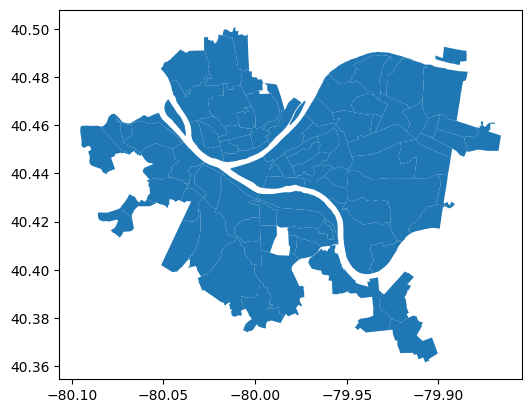

In [15]:
neighborhoods = geopandas.read_file("Neighborhoods/Neighborhoods_.shp") # read in the shapefile
neighborhoods.plot() # plot the geopandas dataframe

Taking a peek at the top 10 neighborhoods with the most arrest

In [16]:
num_arrest = data['INCIDENTNEIGHBORHOOD'].value_counts().sort_values(ascending=False).rename_axis('neighborhood').reset_index(name='Number of Arrests')
num_arrest.head(10)

,neighborhood,Number of Arrests
0,Central Business District,4438
1,South Side Flats,3495
2,Carrick,2349
3,East Allegheny,2217
4,Homewood South,2089
5,Homewood North,1969
6,East Liberty,1887
7,Marshall-Shadeland,1516
8,Bluff,1501
9,Mount Washington,1433


In [17]:
arrest_map = neighborhoods.merge(num_arrest, how='left', left_on='hood', right_on='neighborhood')

<Axes: >

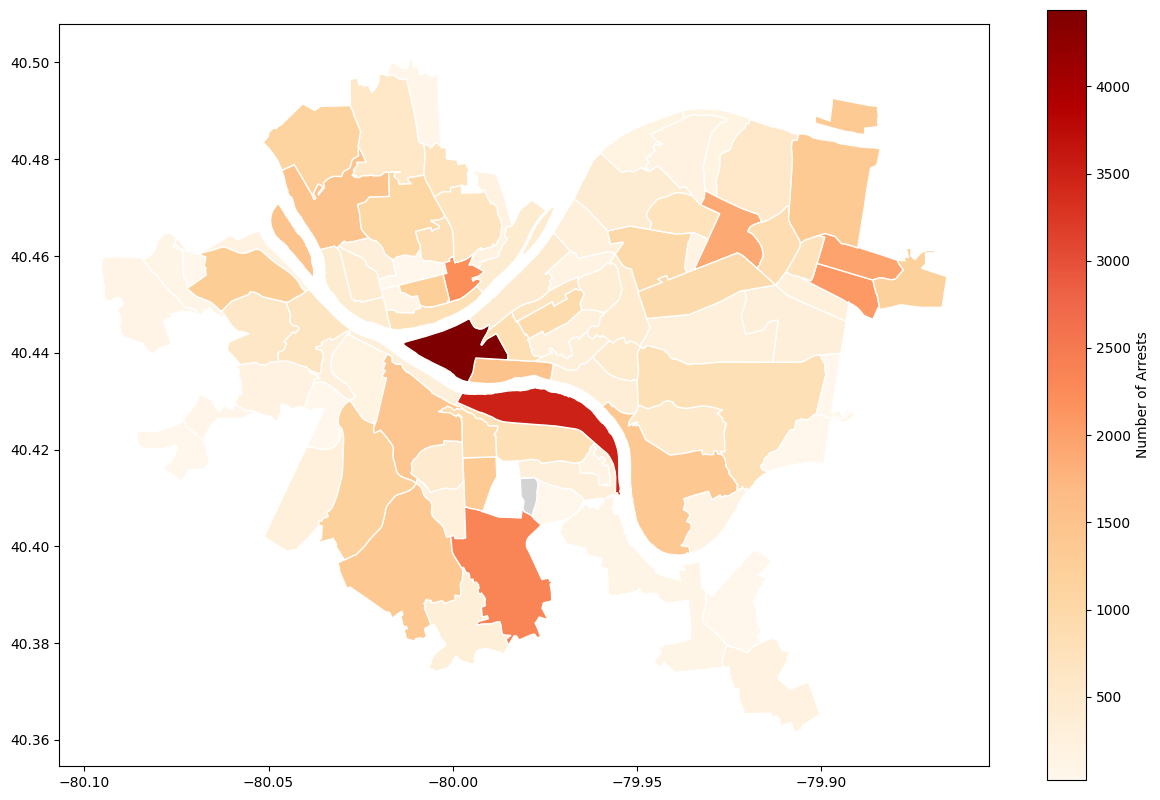

In [18]:
arrest_map.plot(column='Number of Arrests', # set the data to be used for coloring
               cmap='OrRd',              # choose a color palette
               edgecolor="white",        # outline the districts in white
               legend=True,              # show the legend
               legend_kwds={'label': "Number of Arrests"}, # label the legend
               figsize=(15, 10),         # set the size
               missing_kwds={"color": "lightgrey"} # set disctricts with no data to gray
               )

With the map completed, it is time to see exactly which neighborhoods are the safest through a bar graph.

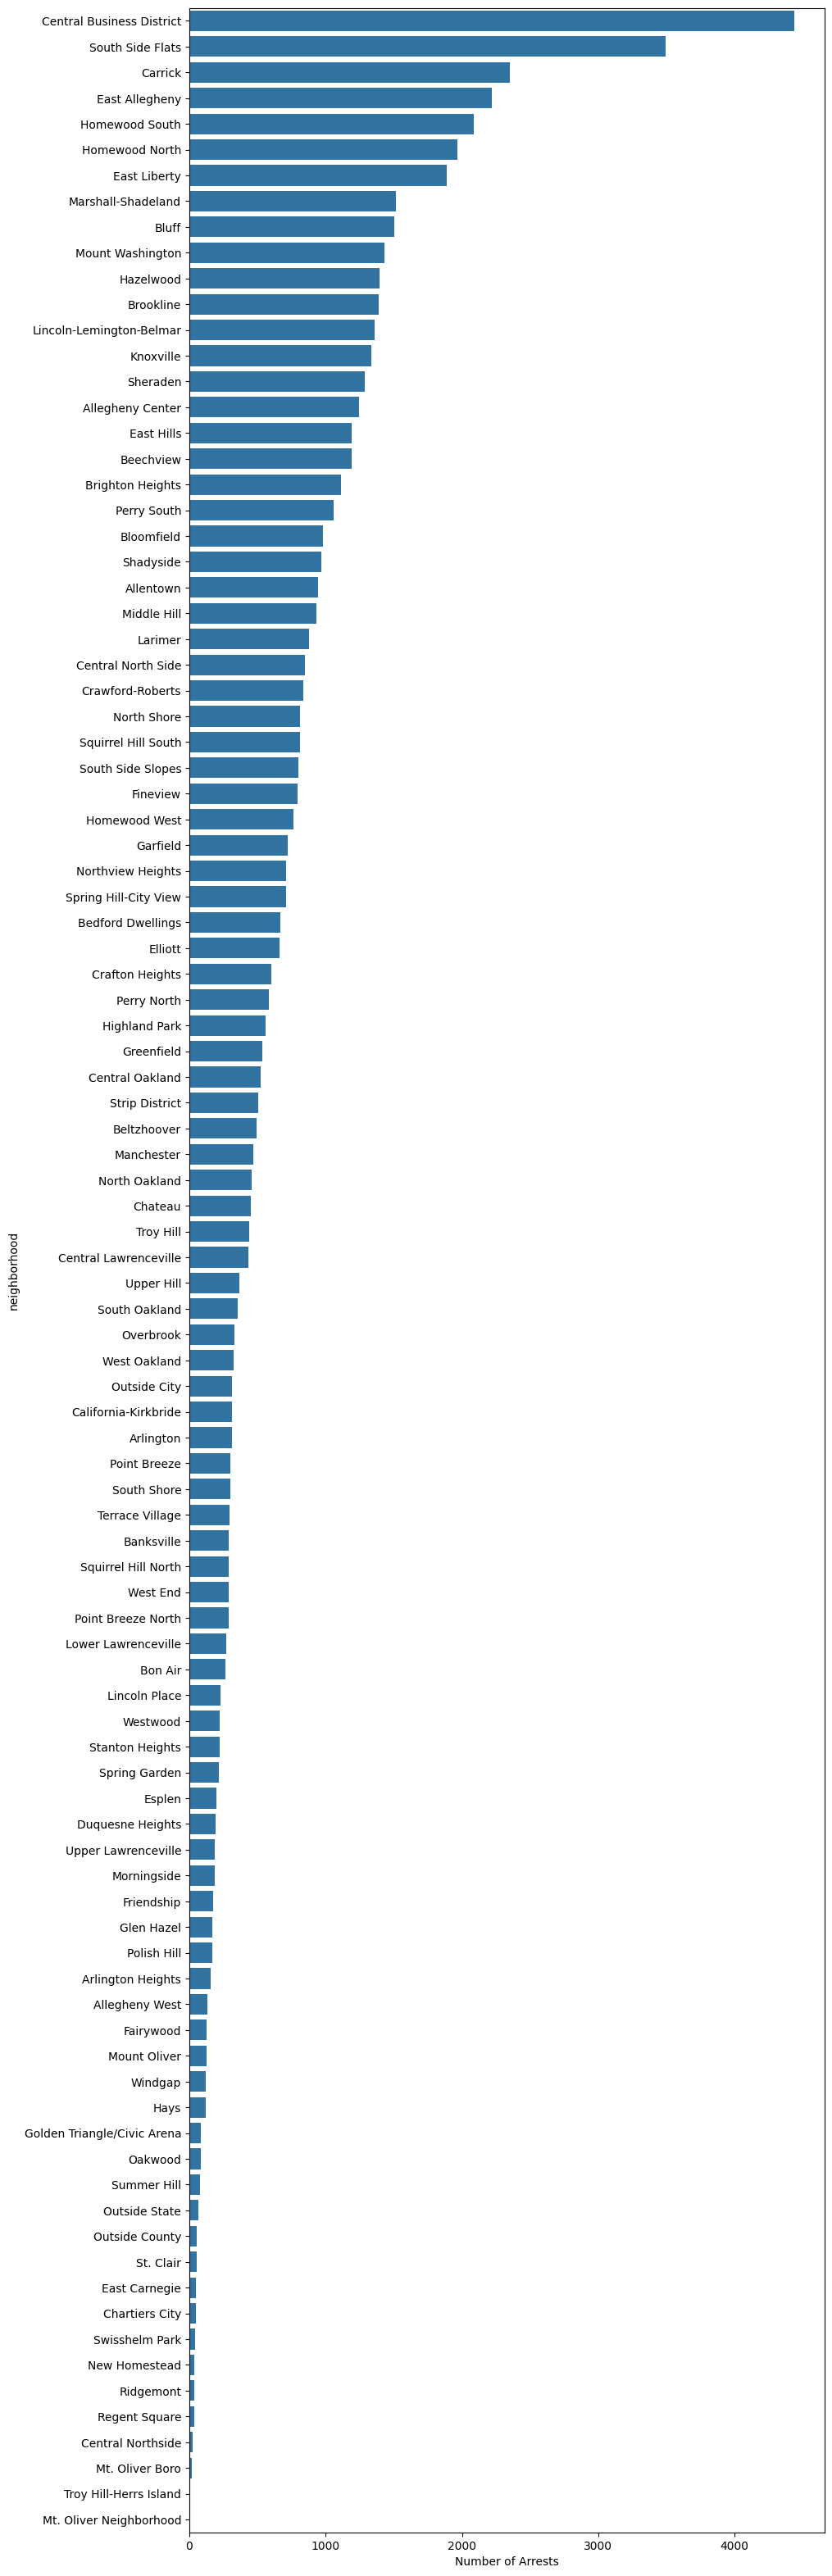

In [19]:
fig_dims = (10, 40)
fig, ax = plt.subplots(figsize=fig_dims)

ax = sb.barplot(x="Number of Arrests", # x axis label
                 y="neighborhood", # y axis label
                 ax=ax, # figsizes
                 data=num_arrest, # data we want to show
                 orient="h", # orientation of the graph
                 order=num_arrest.sort_values("Number of Arrests", ascending = False).neighborhood)

In [20]:
# Get the 5 neighborhoods with the least number of arrests
num_arrest.tail(5)

,neighborhood,Number of Arrests
93,Regent Square,37
94,Central Northside,23
95,Mt. Oliver Boro,18
96,Troy Hill-Herrs Island,6
97,Mt. Oliver Neighborhood,2


Based on the result presented in this notebook, **Mt. Oliver Neighborhood**, **Troy Hill-Herrs Island**, and **Mt. Oliver Boro** are the *top three* safest neighborhoods. While the arrest data articulates the safety of each neighborhood, the information should be taken with a grain of salt. The crime's severity was not measured in this notebook. Thus, the weight of each arrest may differ if severity is involved. Additionally, there could be unaccounted crimes in various neighborhoods. The data used in this notebook may not contain all crimes that have occurred in Pittsburgh. Finally, the data contains arrest that span a 9 year range. Thus, the number of arrests may not represent the how safe a neighborhood is in present day.

---

## Metric 2 – Fires

First, let’s get the data set up. Take a look at the raw data.

In [21]:
import pandas as pd
import geopandas
%matplotlib inline
fires = pd.read_csv('Datasets/Fire Incidents.csv')
fires.head(5)

,_id,call_no,incident_type,type_description,address,alarms,alarm_time,primary_unit,census_tract,neighborhood,council_district,ward,tract,public_works_division,pli_division,police_zone,fire_zone,latitude,longitude
0,1,F160029985,111.0,Building fire,"800 BLOCK CENTER ST, WILKINSBURG PA 15221",1,2016-04-21T05:01:04,231EN16,NaN,NaN,NaN,NaN,4.200356e+10,NaN,NaN,NaN,3-16,40.441275,-79.882485
1,2,F180022058,111.0,Building fire,"1100 BLOCK JANE ST, WILKINSBURG PA 15221",1,2018-03-13T08:34:43,231EN16,NaN,NaN,NaN,NaN,4.200356e+10,NaN,NaN,NaN,3-21,40.436342,-79.881003
2,3,F180022102,131.0,Passenger vehicle fire,"SB STATE HWY 28 SB AT 31S, PITTSBURGH PA 15212",0,2018-03-13T11:54:23,231EN32,2406.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1-1A,NaN,NaN
3,4,F170043431,131.0,Passenger vehicle fire,"1700 BLOCK BELLEAU DR, PITTSBURGH PA 15212",0,2017-05-31T08:39:47,231EN38,2509.0,Fineview,6.0,25.0,4.200325e+10,1.0,25.0,1.0,1-10,40.460303,-80.006980
4,5,F180021111,111.0,Building fire,"2400 BLOCK VILLAGE RD, PITTSBURGH PA 15205",1,2018-03-09T10:26:42,231EN31,2808.0,Fairywood,2.0,28.0,4.200356e+10,5.0,28.0,6.0,1-16,40.449009,-80.076607


Now, let’s focus on the neighborhoods and clean up the data a bit. Here are the number of fires per neighborhood.

In [22]:
fires_by_hood = fires.groupby('neighborhood').size()
fires_by_hood.name = 'Fires by Neighborhood'
fires_by_hood.index.name = 'neighborhood'
fires_by_hood = fires_by_hood.drop('Mount Oliver Borough')
fires_by_hood

neighborhood
Allegheny Center        62
Allegheny West          43
Allentown              127
Arlington               51
Arlington Heights       13
                      ... 
Upper Lawrenceville     52
West End                23
West Oakland            62
Westwood                28
Windgap                 23
Name: Fires by Neighborhood, Length: 90, dtype: int64

Now, let’s gather the population data and divide the number of fires by the number of people in each neighborhood.

In [23]:
population = pd.read_csv('Datasets/Population by Neighborhood.csv').groupby('Neighborhood').sum()['2020_Total_Population']
population = population.rename(index={'Central Business District (Downtown)':'Central Business District'})
population = population.rename(index={'Spring Hill-City':'Spring Hill-City View'})
population = population.drop('Arlington - Arlington Heights (Combined)')
population = pd.concat([population, pd.Series({'Arlington': 1869, 'Arlington Heights': 244})])
population.name = 'Population by Neighborhood'
population.index.name = 'neighborhood'
population = population.sort_index()
population

neighborhood
Allegheny Center       1419
Allegheny West          540
Allentown              2305
Arlington              1869
Arlington Heights       244
                       ... 
Upper Lawrenceville    2394
West End                205
West Oakland           2534
Westwood               3332
Windgap                1344
Name: Population by Neighborhood, Length: 90, dtype: int64

Finally, let’s divide the two lists.

In [24]:
fires_per_people = fires_by_hood/population
fires_per_people.name = 'Fires per People by Neighborhood'
fires_per_people.index.name = 'neighborhood'
fires_per_people.sort_values()

neighborhood
Westwood               0.008403
Regent Square          0.009269
Morningside            0.009840
Squirrel Hill North    0.011365
Swisshelm Park         0.011949
                         ...   
Homewood West          0.096573
West End               0.112195
North Shore            0.215947
South Shore            0.793103
Chateau                2.157895
Name: Fires per People by Neighborhood, Length: 90, dtype: float64

We’ll remove two neighborhoods which are essentially unpopulated, and then visualize it.

<Axes: >

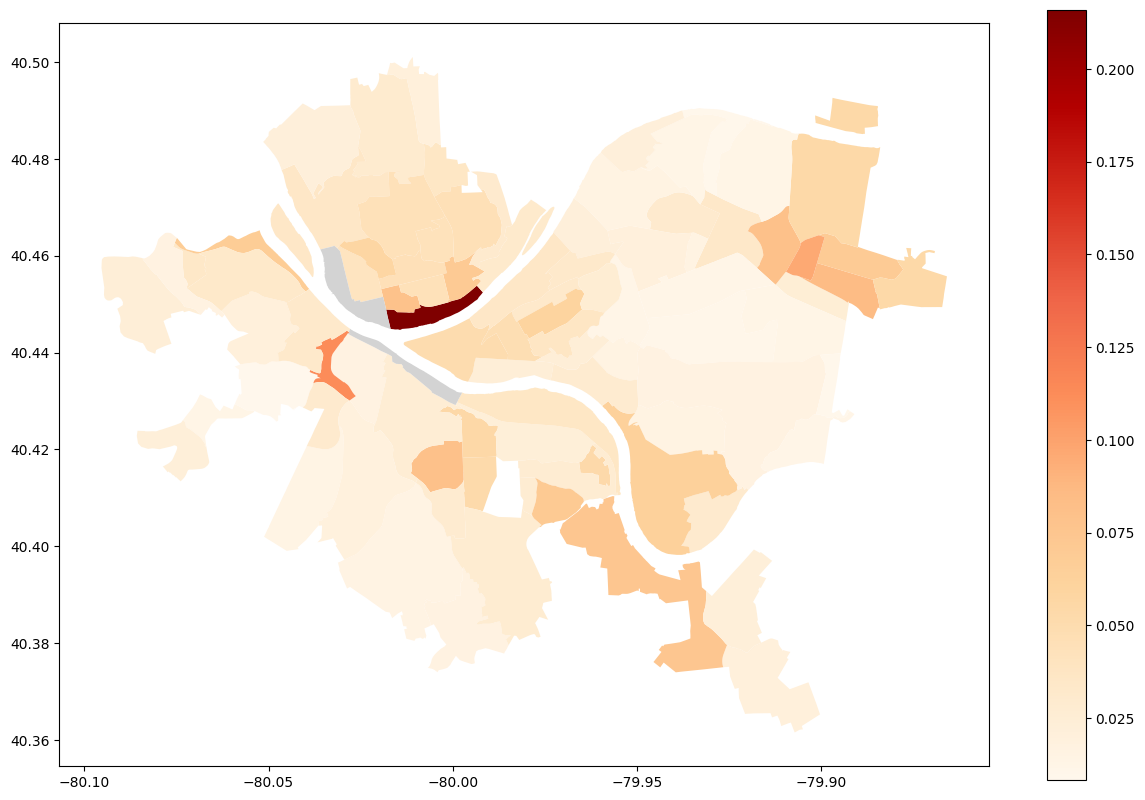

In [25]:
neighborhoods = geopandas.read_file('Neighborhoods/Neighborhoods_.shp')
fires_per_people = fires_per_people.drop('South Shore')
fires_per_people = fires_per_people.drop('Chateau')
fires_per_people_map = neighborhoods.merge(fires_per_people.to_frame(), how='left', left_on='hood', right_on='neighborhood')
fires_per_people_map.plot(column='Fires per People by Neighborhood', legend=True, figsize=(15,10), cmap='OrRd', missing_kwds={'color': 'lightgrey'})

How about a chart?

<Axes: ylabel='neighborhood'>

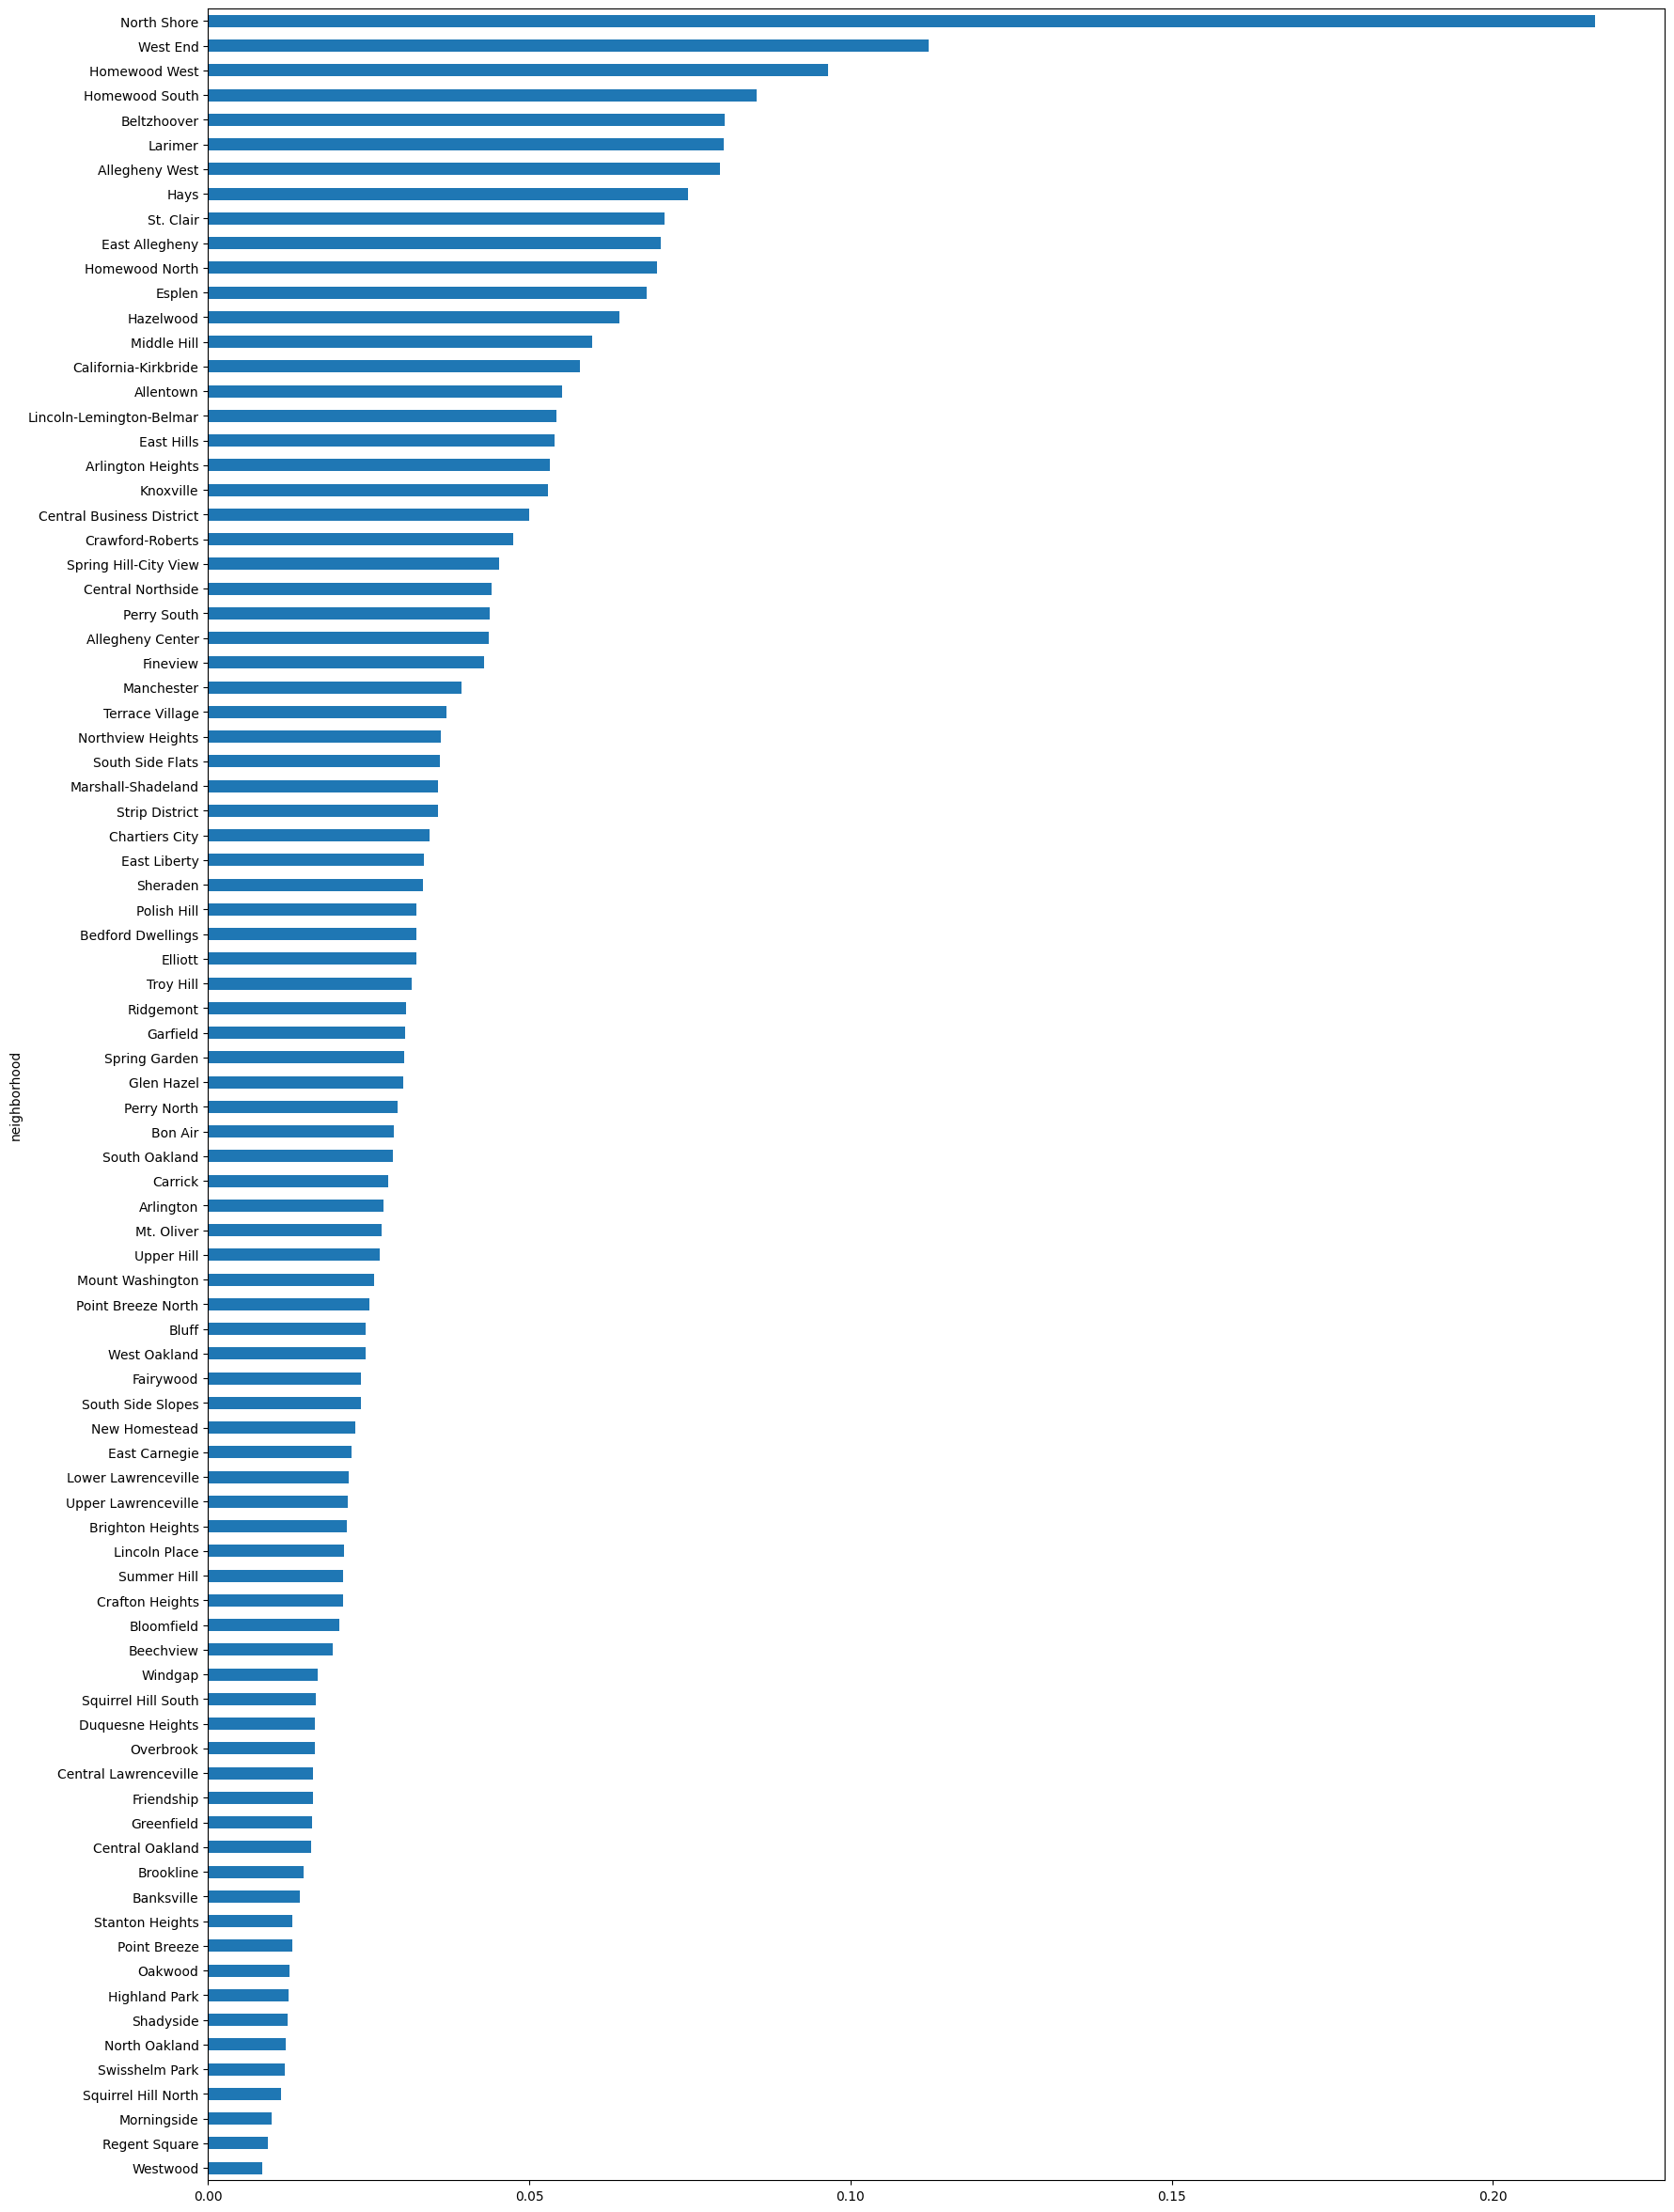

In [27]:
fires_per_people.sort_values().plot.barh(figsize=(20,30))

Thus, the neighborhoods with the least fires per capita are, in descending order:
- Swisshelm Park
- Squirrel Hill North
- Morningside
- Regent Square
- Westwood